In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from rdflib.tools.csv2rdf import column
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
folder_path = r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned" 

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

df_list = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, parse_dates=["Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss"])
    df_list.append(df)

df_merged = pd.concat(df_list, ignore_index=True)

In [6]:
df_merged = df_merged.drop(columns='Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss')

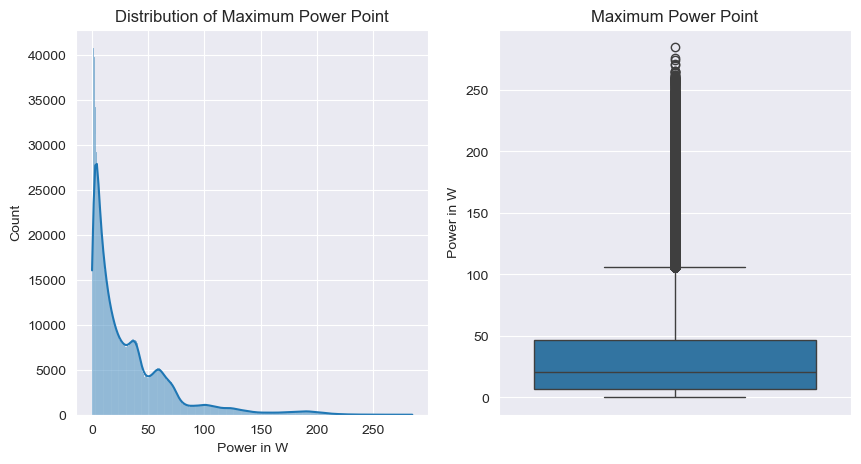

In [13]:
X = df_merged.drop(columns=['Pmp (W)'])
y = df_merged['Pmp (W)']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(y, kde=True)
plt.title('Distribution of Maximum Power Point')
plt.xlabel('Power in W')

plt.subplot(1, 2, 2)
sns.boxplot(y=y)
plt.title('Maximum Power Point')
plt.ylabel('Power in W')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
## 4. Hyperparameter Analysis
# -----------------------

def analyze_hyperparameters(X_train, y_train):
    """
    Analyze effect of different hyperparameters using cross-validation
    """
    # Test different numbers of trees
    n_trees = [10, 50, 100, 200, 500]
    tree_scores = []
    
    for n in n_trees:
        rf = RandomForestRegressor(n_estimators=n, random_state=42)
        scores = cross_val_score(rf, X_train, y_train, cv=5, 
                               scoring='r2')
        tree_scores.append({
            'n_trees': n,
            'mean_score': scores.mean(),
            'std_score': scores.std()
        })
    
    # Test different max depths
    max_depths = [3, 5, 7, 10, None]
    depth_scores = []
    
    for depth in max_depths:
        rf = RandomForestRegressor(max_depth=depth, random_state=42)
        scores = cross_val_score(rf, X_train, y_train, cv=5, 
                               scoring='r2')
        depth_scores.append({
            'max_depth': str(depth),
            'mean_score': scores.mean(),
            'std_score': scores.std()
        })
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Number of trees plot
    tree_df = pd.DataFrame(tree_scores)
    ax1.errorbar(tree_df['n_trees'], tree_df['mean_score'], 
                yerr=tree_df['std_score'], marker='o')
    ax1.set_xlabel('Number of Trees')
    ax1.set_ylabel('Cross-validation R² Score')
    ax1.set_title('Effect of Number of Trees')
    ax1.grid(True)
    
    # Max depth plot
    depth_df = pd.DataFrame(depth_scores)
    ax2.errorbar(range(len(max_depths)), depth_df['mean_score'], 
                yerr=depth_df['std_score'], marker='o')
    ax2.set_xlabel('Max Depth')
    ax2.set_xticks(range(len(max_depths)))
    ax2.set_xticklabels(max_depths)
    ax2.set_ylabel('Cross-validation R² Score')
    ax2.set_title('Effect of Max Depth')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return tree_df, depth_df

# Analyze hyperparameters
print("\nHyperparameter Analysis:")
tree_results, depth_results = analyze_hyperparameters(X_train, y_train)

print("\nResults with different numbers of trees:")
print(tree_results)
print("\nResults with different max depths:")
print(depth_results)


Hyperparameter Analysis:
